In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics 


table = pd.read_csv('cmb1e.csv')
from sklearn.metrics import mean_squared_error

y = pd.DataFrame(table["MKPRUPNZN"])
X = pd.DataFrame(table[["MKTCP","LTCPCUSD"]]) 


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=277843)



from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train.values.ravel())

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [2]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7885196374622356


In [3]:
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.8403755868544601
Recall: 0.8325581395348837


TPR Test :	 0.8325581395348837
TNR Test :	 0.7068965517241379

FPR Test :	 0.29310344827586204
FNR Test :	 0.16744186046511628


<AxesSubplot:>

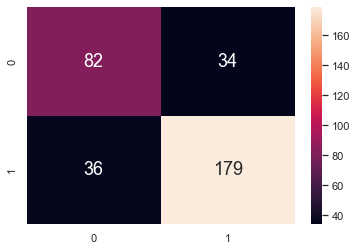

In [4]:
from sklearn.metrics import classification_report, confusion_matrix
#confusion_matrix(y_test,y_pred)
#classification_report(y_test,y_pred)

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})